## Q1
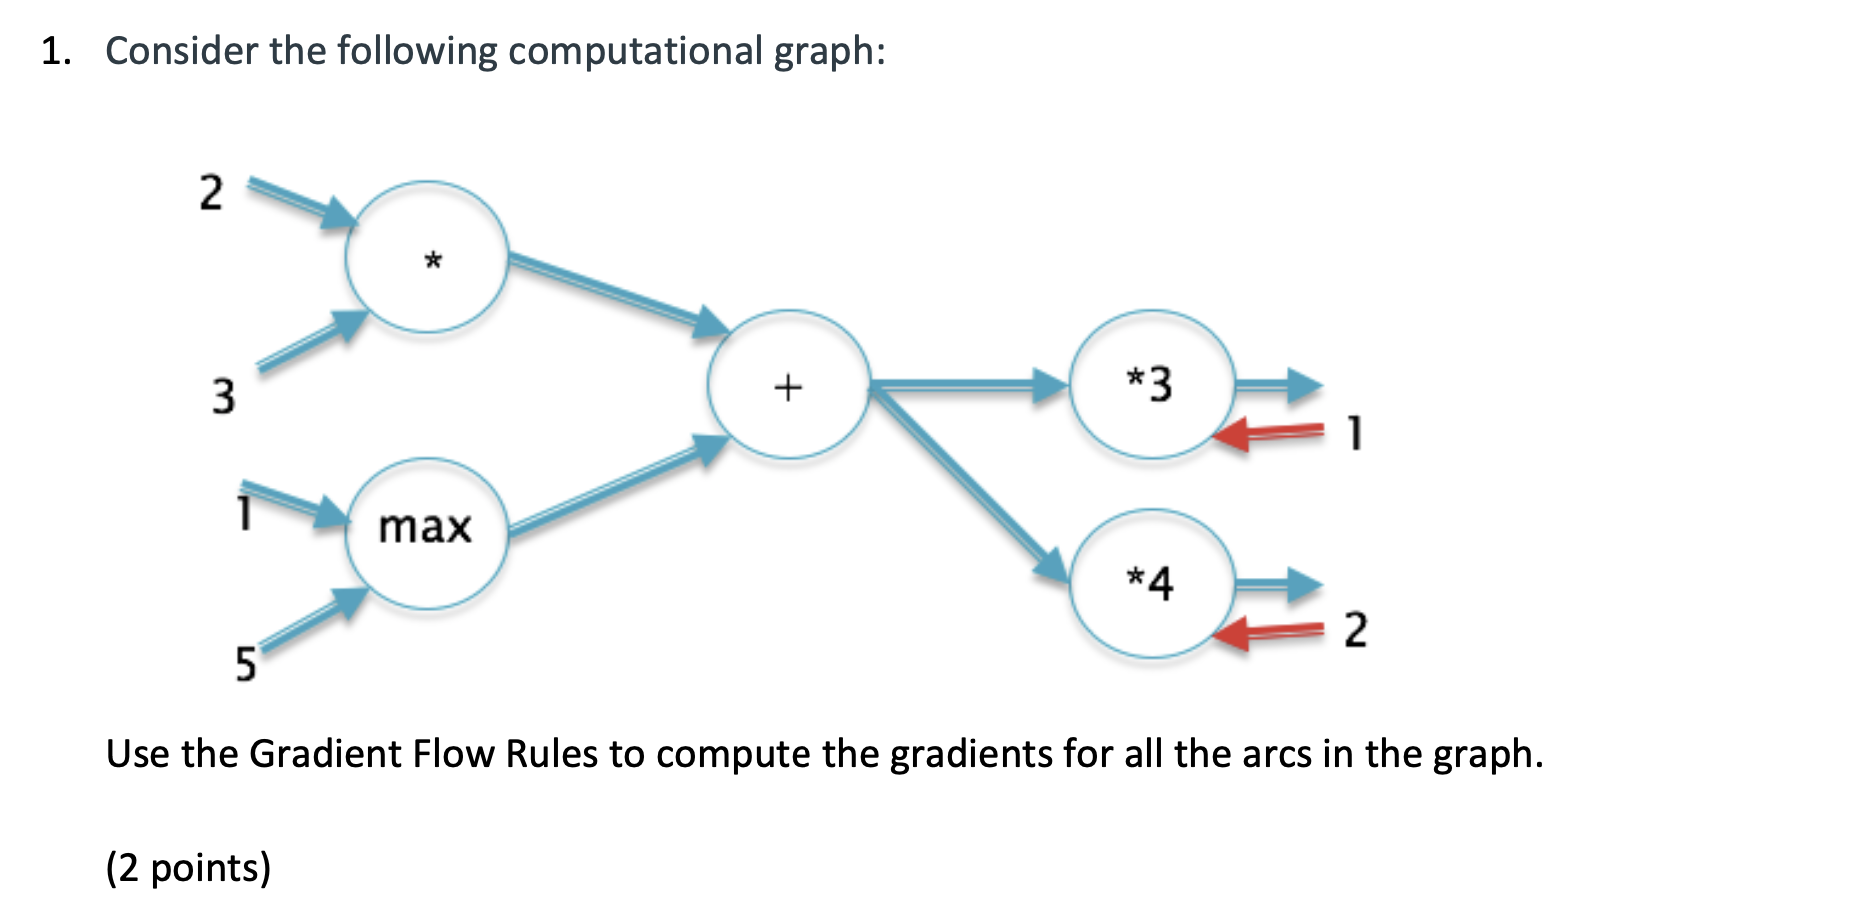

## Answer

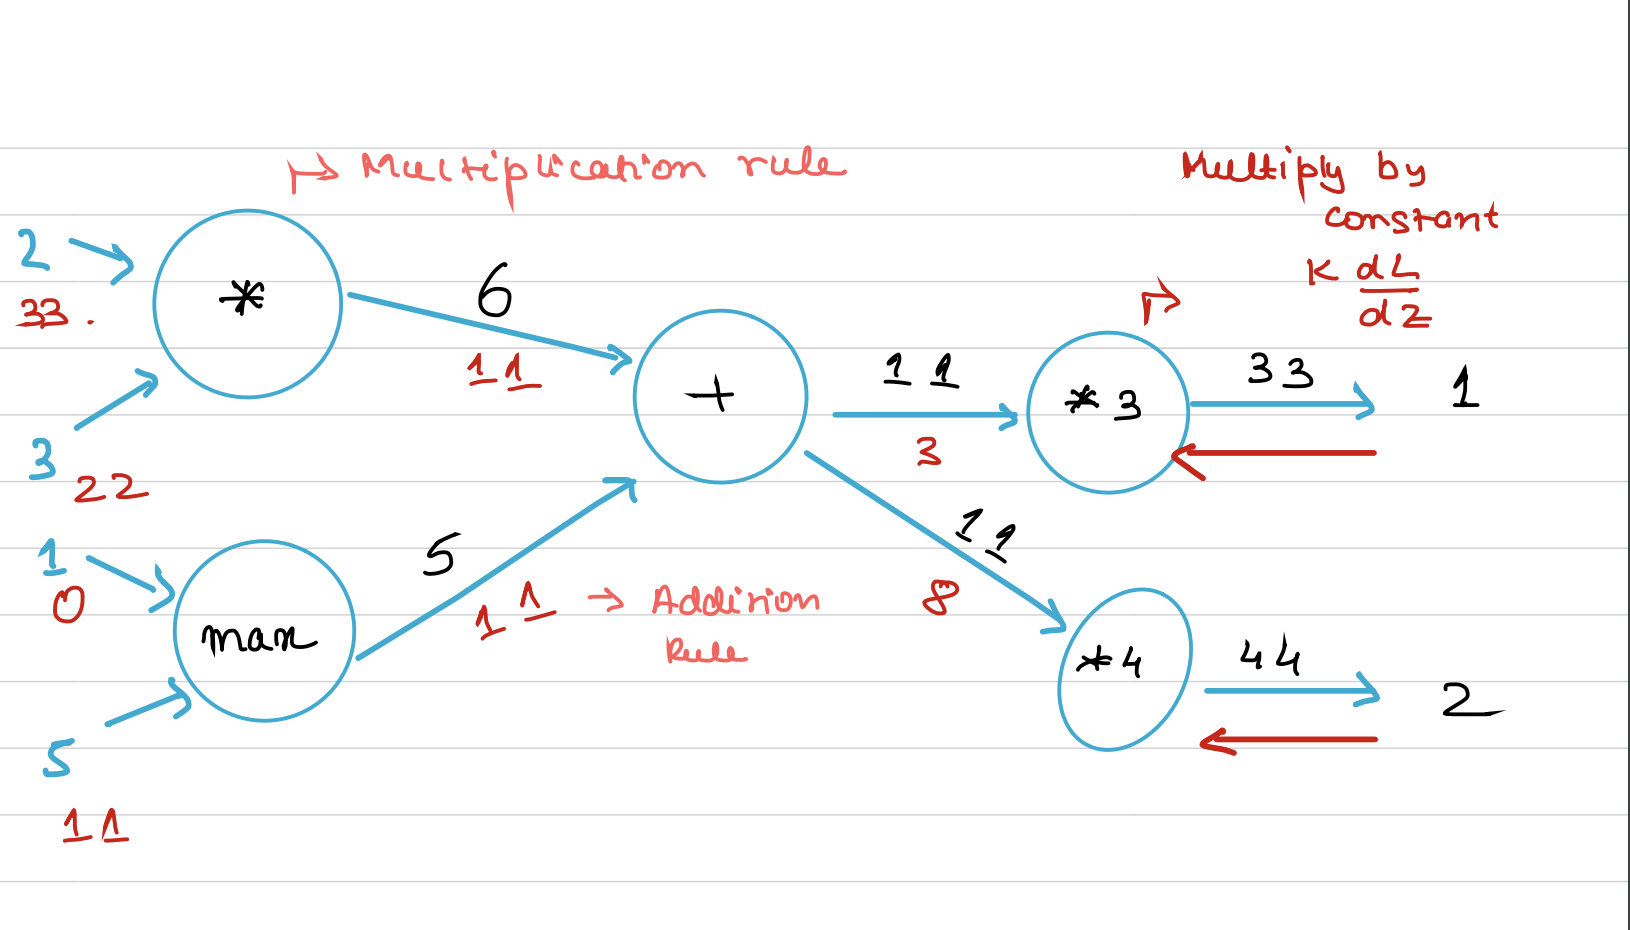

## Q2)

Consider a Deep Feed Forward Network, of the type shown on Page 16 of Lecture 4 Slides, composed of an Input Layer with 10 nodes, followed by a Hidden Layer with 50 nodes and finally an Output Layer with 3 nodes. Assume the activation function f is given by ReLU, and the output function h is given by Softmax.
- a. Compute the number of parameters (weights and biases) required to describe the network.
- b. Write a Python program to do a forward pass through the network. Assume that the input training sample X = (0.5, 0.6, 0.1, 0.25, 0.33, 0.9, 0.88, 0.76, 0.69, 0.95). Also assume that all the weights and biases are initialized according to a Uniform distribution between [0,0.1]
- c. Assuming that the output Label corresponding to X, is T = (1, 0, 0). Using the results of part (b), compute the Cross Entropy Loss Function. In order to verify the forward pass, the Loss Function should compute to log(3), explain why.
- d. Write a Python program to do a backward pass through the network, and compute all the delta values.
- e. Finally extend the Python program to compute the new weight parameters using stochastic gradient descent.In order to verify that the algorithm has been coded correctly, you can do the following: Put the forward and backward passes in a loop (with the single training sample given in Part (b) and the corresponding Label in Part (c)). After several iterations you should see the Loss Function go to zero (explain why).

## a)

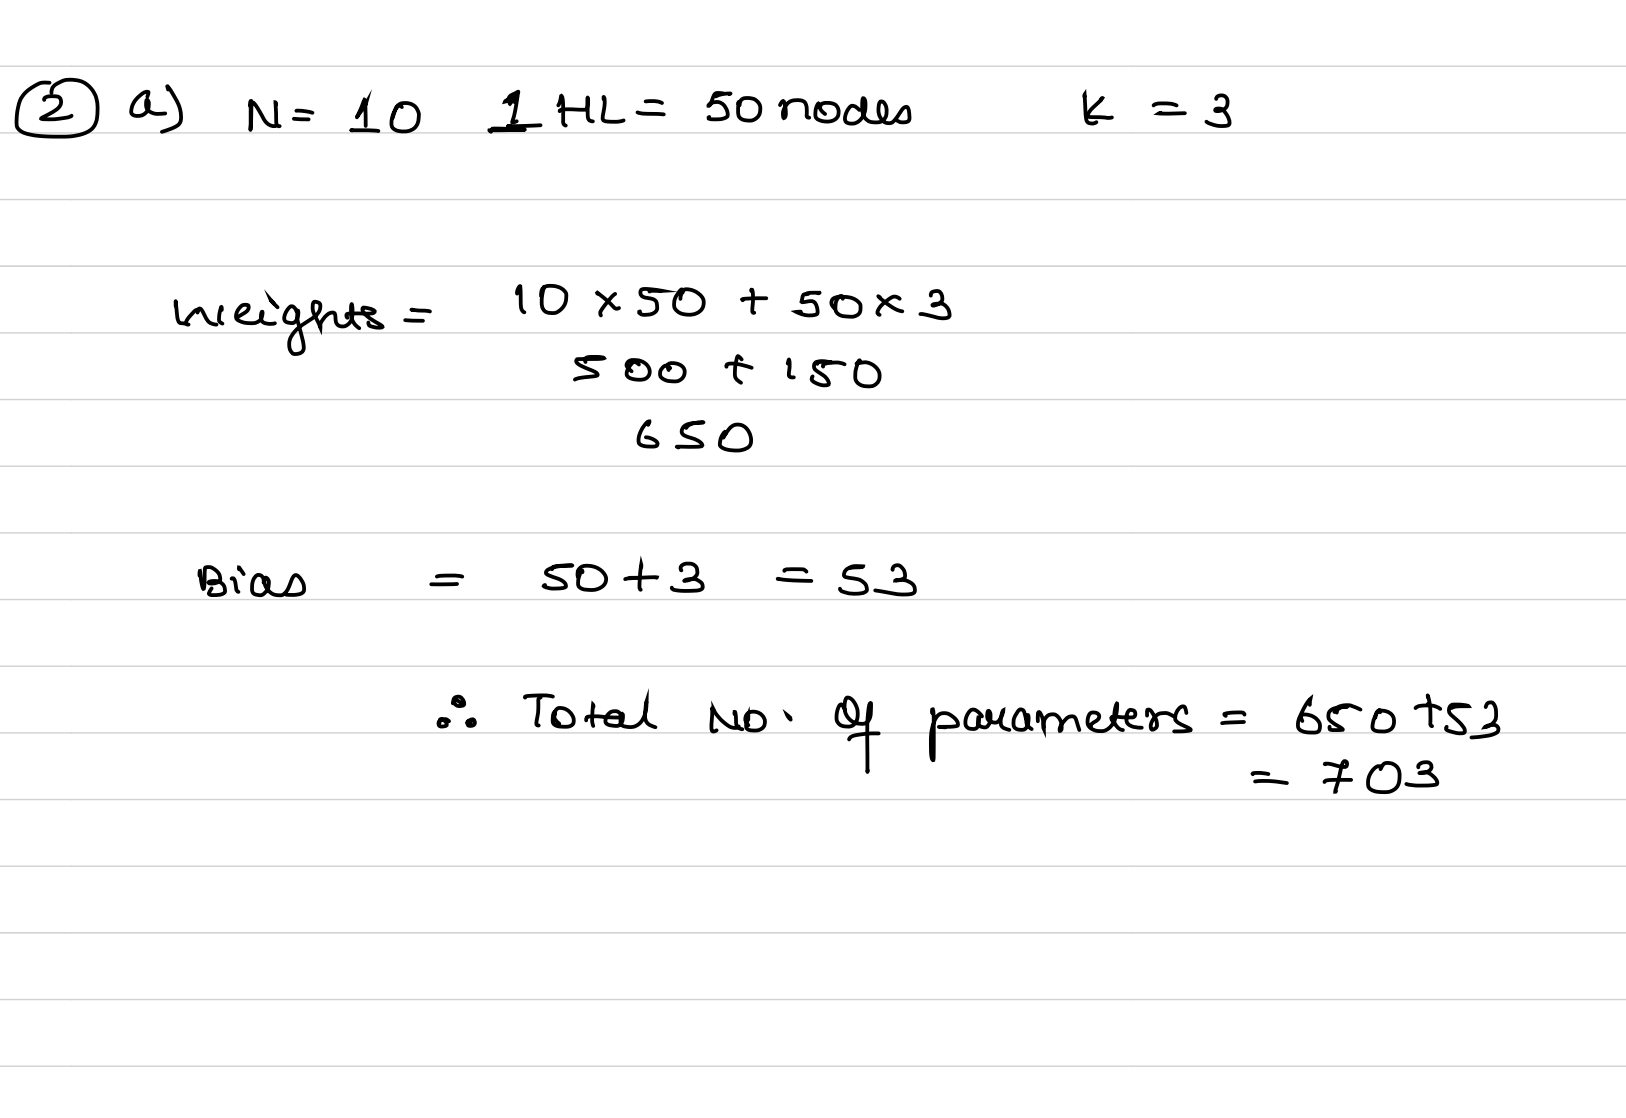

## b)

In [1]:
import numpy as np
import copy

class model_setup:
    
    def __init__(self,X,T):
        
        self.X = X
        self.T = T ## T labels for Q2) c) 
        
    def layer_sizes(self):
        n_x = self.X.shape[0] ## 10 rows, 1 column 
        n_h = 50    
        n_y = self.T.shape[0] ## 3
        return (n_x,n_h,n_y)
        
    def generate_params(self,model):
        (n_x, n_h, n_y) = model.layer_sizes()
        np.random.seed(50)
        ## Wts and biases for the first layer i.e. hidden layer
        W1 = np.random.uniform(0,0.1,(n_h,n_x))
        b1 = np.full((n_h,1),np.random.uniform(0,0.1))
        ## Wts and biases for the output layer
        W2 = np.random.uniform(0,0.1,(n_y,n_h))
        b2 = np.full((n_y,1),(np.random.uniform(0,0.1)))
        
        assert (W1.shape == (n_h, n_x))
        assert (b1.shape == (n_h, 1))
        assert (W2.shape == (n_y, n_h))
        assert (b2.shape == (n_y, 1))
        
        return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

    def pre_activation(self,layer,w,b): ## Step 1
        return (np.dot(w,layer)+b)
        
    def activation_ReLU(self,z):       ## Step 2
        return np.maximum(0,z)
        
    def output_Softmax(self,z2):      ## Step 3
        numerator = np.exp(z2)
        denominator = sum(np.exp(z2))
        return numerator/denominator

## Initialize weights and Forward Pass

In [2]:
def forward_pass(train_model,params):
    ## Step1: Setting up the model layers and their vector shapes:
    (n_x,n_h,n_y) = train_model.layer_sizes()

    ##Caculate the forward pass: A1,Z1
    Z1 = train_model.pre_activation(train_model.X,params["W1"],params["b1"])    ## 1st layer - [wT].[x] + [b1] 
   
    A1 = train_model.activation_ReLU(Z1)                        ## Activation fn - ReLU
    
    Z2 = train_model.pre_activation(A1,params["W2"],params["b2"])              ## 2nd layer - [wT].[x] + [b2]
    
    Y = train_model.output_Softmax(Z2) ## A2                   ## Output fn - Softmax
   
    return {"A1": A1, "Z1": Z1, "Y": Y, "Z2": Z2}


## Input and True Label

In [3]:
##Main function:
train_model = model_setup(np.array([[0.5],[0.6],[0.1],[0.25],[0.33],[0.9],[0.88],[0.76],[0.69],[0.95]]),
                          np.array([[1],[0],[0]]))


## Answer

In [4]:
## Step1: Setting up the model layers and their vector shapes:
print('The size of the model: (input=%i, hidden=%i, output=%i)' % train_model.layer_sizes())
print('-'*100)

## Step 2: Initialize parameters.
params = train_model.generate_params(train_model)
print('The size of the weights for the 1st layer i.e. hidden layer is:',params["W1"].shape)
print('The size of the bias for the 1st layer i.e. hidden layer is:',params["b1"].shape)
print('The size of the weights for the 2st layer i.e. output layer is:',params["W2"].shape)
print('The size of the bias for the 2st layer i.e. output layer is:',params["b2"].shape)
print('-'*100)

## Forward pass
fwd_result = forward_pass(train_model,params)
print('The size of the pre-activation calculation is :', fwd_result["Z1"].shape)
print('-'*100)
print('The size of the activation matrix is :', fwd_result["A1"].shape)
print('-'*100)
print('The size of the 2nd layer pre-activation is :', fwd_result["Z2"].shape)
print('-'*100)
print('The size of the output layer is :', fwd_result["Y"].shape)
print('-'*100)
print('The output vector is :\n', fwd_result["Y"])
print('-'*100)

The size of the model: (input=10, hidden=50, output=3)
----------------------------------------------------------------------------------------------------
The size of the weights for the 1st layer i.e. hidden layer is: (50, 10)
The size of the bias for the 1st layer i.e. hidden layer is: (50, 1)
The size of the weights for the 2st layer i.e. output layer is: (3, 50)
The size of the bias for the 2st layer i.e. output layer is: (3, 1)
----------------------------------------------------------------------------------------------------
The size of the pre-activation calculation is : (50, 1)
----------------------------------------------------------------------------------------------------
The size of the activation matrix is : (50, 1)
----------------------------------------------------------------------------------------------------
The size of the 2nd layer pre-activation is : (3, 1)
----------------------------------------------------------------------------------------------------
Th

## c) Cross Entropy, $- \sum\limits_{i=0}^{k}  t^{(i)}\log(Y{(i)})$ :

In [5]:
def calculate_loss(Y,Tlabel):
    ## Above T is referring to the Ground Truth and Y is referring to the forward pass output vector - 
    return (-sum(np.dot(np.log(Y).T,Tlabel))) ## (3,1) . (3,1) so k = 3

In [6]:
loss = calculate_loss(fwd_result["Y"],train_model.T)
print('The Cross Entropy Loss is:\n ',loss[0])
print('\nTo verify the forward pass we will take log(3): \n',np.log(3))
print('-'*100)

The Cross Entropy Loss is:
  1.0735367063033807

To verify the forward pass we will take log(3): 
 1.0986122886681098
----------------------------------------------------------------------------------------------------


## Explanation

We used the output vector generated by the forward pass and calculated the loss numerically. 
The numerical answer is same as ln(3) as shown in the image below.

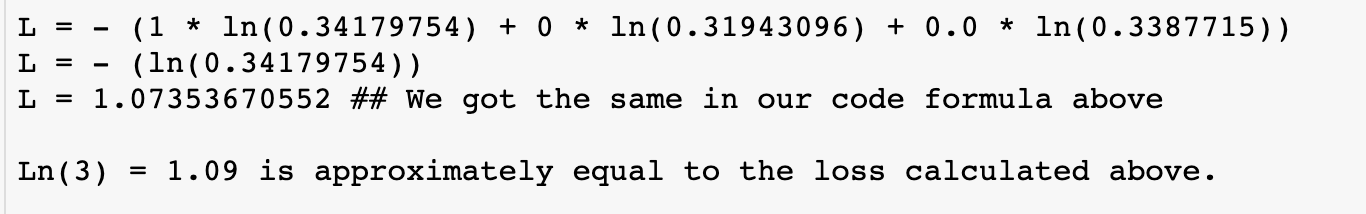


## d) Backward Pass Function

In [7]:
def backward_pass(train_model, params, fwd_result):
    m = train_model.X.shape[1]
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = params["W1"]
    W2 = params["W2"]
        
    # Retrieve also A1 and Y from dictionary "cache".
    A1 = fwd_result["A1"]
    Y = fwd_result["Y"]
  
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = Y - train_model.T
    dW2 = np.dot(dZ2,np.transpose(A1))/m
    db2 = np.sum(dZ2,axis = 1, keepdims = True)/m
    dZ1 = np.dot(np.transpose(W2),dZ2) * (1-np.power(A1,2))
    dW1 = np.dot(dZ1,np.transpose(train_model.X)) /m
    db1 = np.sum(dZ1, axis =1, keepdims = True)/m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}    
    return grads


In [8]:
grads =  backward_pass(train_model, params, fwd_result)
grads_shape = {"dW1": grads["dW1"].shape, 
               "db1": grads["db1"].shape, 
               "dW2": grads["dW2"].shape, 
               "db2": grads["db2"].shape}
print('All delta matrices shapes are', grads_shape)

All delta matrices shapes are {'dW1': (50, 10), 'db1': (50, 1), 'dW2': (3, 50), 'db2': (3, 1)}


## e) SGD

In [9]:
def update_params(params, grads, learning_rate = 0.9):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2'] 
    # Update rule for each parameter for each data points of the entire dataset.
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1) 
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    # Return updated params.
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [10]:
for i in range(0, train_model.X.shape[0]):
            params_SGD = copy.deepcopy(params)
            X = train_model.X[i]
            model_SGD = train_model
            
            # Forward propagation.
            fwd_result = forward_pass(model_SGD,params_SGD)
            
            # loss:
            loss = calculate_loss(fwd_result["Y"], train_model.T)

            # Backward propogation
            
            grads_SGD = grads
            grads = backward_pass(train_model, params_SGD, fwd_result)
            
            # Update weights
            params_SGD = update_params(params_SGD,grads_SGD)
            print("Updated param W1 for input",i,"is")
            print(params_SGD["W1"][:1])  ## Showing only first 1 weights to show compariso

Updated param W1 for input 0 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 1 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 2 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 3 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 4 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 5 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795 0.09896014 0.09581921 0.05821436]]
Updated param W1 for input 6 is
[[0.06378302 0.03999574 0.02841196 0.04679442 0.0471846  0.12543857
  0.06602795

## f) Model with iterations

In [24]:
def neural_network(dataset, T, params, num_iterations = 40000):
    loss_for_print = []
    for k in range(0, num_iterations):
        loss = 0
        num_inputs = len(dataset)
        for i in range(0, num_inputs):
            X = dataset[i]
            model = model_setup(X,T)
            # Forward propagation.
            fwd_result = forward_pass(model,params)
            # Calculate loss
            loss = calculate_loss(fwd_result["Y"], T)
            # Backward propogation
            grads = backward_pass(model, params, fwd_result)
            # Update weights
            params = update_params(params, grads)
        # Print the cost every 100 iterations
            loss_for_print.append(loss)
    return loss_for_print
            
loss_for_print = neural_network([train_model.X], train_model.T , copy.deepcopy(params))

for each in range(1,20):
    print ("Cost after iteration %i: %f" % (each, loss_for_print[each]))

Cost after iteration 1: 0.001029
Cost after iteration 2: 0.000993
Cost after iteration 3: 0.000959
Cost after iteration 4: 0.000928
Cost after iteration 5: 0.000898
Cost after iteration 6: 0.000870
Cost after iteration 7: 0.000844
Cost after iteration 8: 0.000819
Cost after iteration 9: 0.000796
Cost after iteration 10: 0.000774
Cost after iteration 11: 0.000753
Cost after iteration 12: 0.000733
Cost after iteration 13: 0.000714
Cost after iteration 14: 0.000696
Cost after iteration 15: 0.000679
Cost after iteration 16: 0.000663
Cost after iteration 17: 0.000647
Cost after iteration 18: 0.000632
Cost after iteration 19: 0.000618


<img src="">

### The loss function gets to 0 after 40000 iteration when the learning rate - 0.9.

## Explanation for  loss function getting to 0.

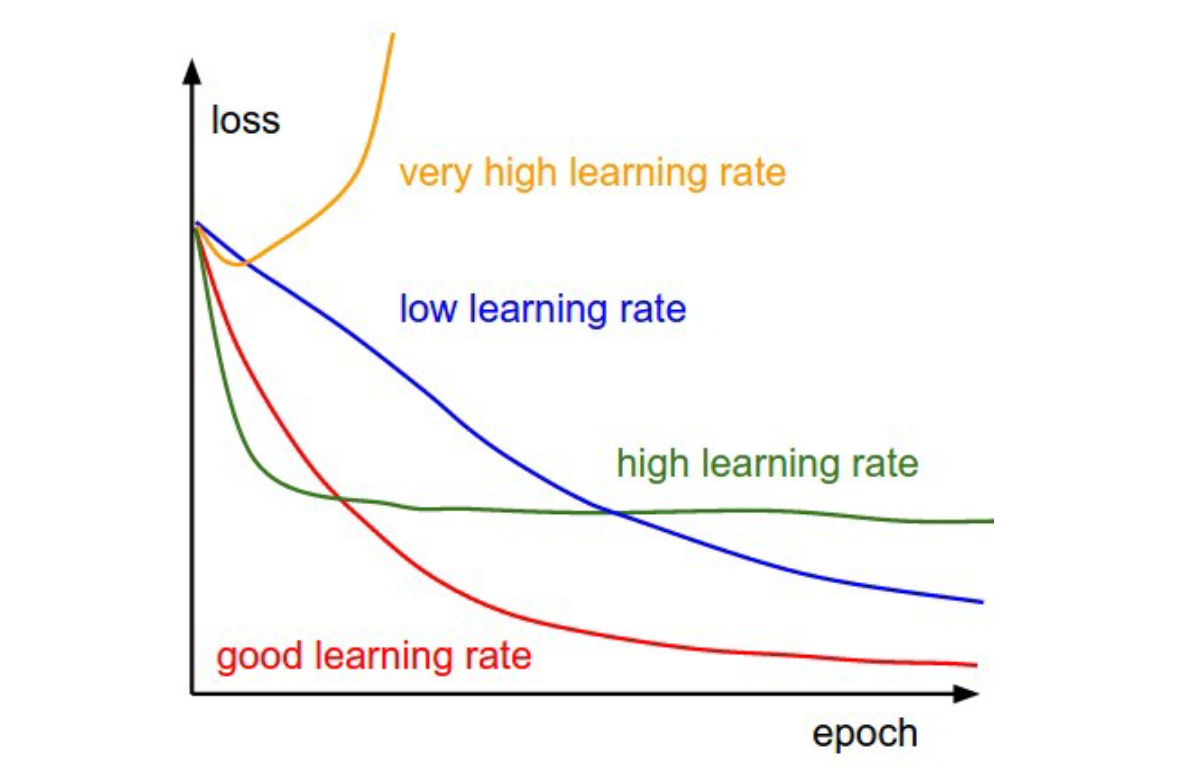

We see that as we choose a good learning rate and increase the number of epochs the loss function goes down gradually and becomes zero. Here, as number of iterations or epochs increase our model gets better at recognizing the pattern and the loss goes down gradually and eventually to 0.

Also, as we are testing it out only one dataset it becomes easier for the model to learn it. Practically, this will not be the case in the real world as there will always be some loss. 

## Q3)
The MNIST_Fashion dataset comes with Keras, and can be loaded using the commands:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

This dataset corresponds to grayscale coded images of various clothing items. Just as in MNIST, there are 10 classes and each image is a 28*28 matrix (see https://www.tensorflow.org/tutorials/keras/basic_classification for more information about this dataset). Answer the following:
- a. What is the best classification accuracy that you can achieve with the Linear Model on this dataset?
- b. Replace the Linear model with a Fully Connected Feed Forward Model with one or more Hidden Layers. What is the best classification accuracy that you can achieve with this model? In order to get better performance , you can vary the number of hidden layers and the number of nodes per hidden layer


In [26]:
# Imports
# TensorFlow and tf.keras
import tensorflow as tf
#tf.random.set_seed(1)
from tensorflow import keras

from keras import Input
from keras.utils import to_categorical
from keras import Sequential, Model
from keras import layers
from keras import models

# Other libraries
import numpy as np
np.random.seed(50)
#import matplotlib.pyplot as plt

print(tf.__version__)

1.15.2


### Load data and Preprocessing

In [27]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [28]:
#reshaping the images
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape(10000 , 28*28)

#normalization
train_images=train_images.astype('float32') / 255
test_images=test_images.astype('float32') / 255

In [29]:
#One hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [30]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


### Define and compile the model

In [31]:
network1 = models.Sequential()
network1.add(layers.Dense(10))

## Compile the model
network1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model

In [32]:
history1=network1.fit(train_images, train_labels, epochs=20, batch_size=128, 
                      validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 29us/step - loss: 5.3373 - accuracy: 0.1026 - val_loss: 6.4360 - val_accuracy: 0.1052
Epoch 2/20
48000/48000 [==============================] - 1s 20us/step - loss: 7.9079 - accuracy: 0.1045 - val_loss: 8.7486 - val_accuracy: 0.1053
Epoch 3/20
48000/48000 [==============================] - 1s 21us/step - loss: 9.2317 - accuracy: 0.1044 - val_loss: 9.5946 - val_accuracy: 0.1051
Epoch 4/20
48000/48000 [==============================] - 1s 20us/step - loss: 9.8528 - accuracy: 0.1044 - val_loss: 9.9828 - val_accuracy: 0.1052
Epoch 5/20
48000/48000 [==============================] - 1s 20us/step - loss: 10.1402 - accuracy: 0.1044 - val_loss: 10.1547 - val_accuracy: 0.1050
Epoch 6/20
48000/48000 [==============================] - 1s 20us/step - loss: 10.2436 - accuracy: 0.1044 - val_loss: 

### Accuracy

In [33]:
history_dict1= history1.history
history_dict1.keys()
test_loss1,test_acc1= network1.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/step


In [34]:
print('test_accuracy:' ,test_acc1)

test_accuracy: 0.10000000149011612


### Accuracy is  0.10000000149011612

## 3b) 

Replace the Linear model with a Fully Connected Feed Forward Model with one or
more Hidden Layers.

What is the best classification accuracy that you can achieve
with this model?
In order to get better performance , you can vary the number of
hidden layers and the number of nodes per hidden layer.

### Model 1 hidden layer with  512 neurons and sgd optimizer

In [35]:
## Fully connected neural network with 1 hidden layer
network1 = models.Sequential()
network1.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network1.add(layers.Dense(10,activation='softmax'))
network1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
history1= network1.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 60us/step - loss: 1.0821 - accuracy: 0.6727 - val_loss: 0.7701 - val_accuracy: 0.7510
Epoch 2/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.7031 - accuracy: 0.7760 - val_loss: 0.6457 - val_accuracy: 0.7867
Epoch 3/20
48000/48000 [==============================] - 3s 56us/step - loss: 0.6163 - accuracy: 0.8029 - val_loss: 0.5855 - val_accuracy: 0.8088
Epoch 4/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.5697 - accuracy: 0.8140 - val_loss: 0.5512 - val_accuracy: 0.8188
Epoch 5/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.5389 - accuracy: 0.8228 - val_loss: 0.5273 - val_accuracy: 0.8257
Epoch 6/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.5171 - accuracy: 0.8281 - val_loss: 0.5085 - val_accuracy: 0.8303
Epoch 7/20
48000/48000 [==============================] - 3s 56us/st

In [37]:
history_dict1= history1.history
history_dict1.keys()
test_loss1,test_acc1 =network1.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 54us/step


In [39]:
print('test_accuracy:' ,test_acc1)

test_accuracy: 0.8461999893188477


### Test Accuracy : 0.8461999893188477

###  Improved Model : 1 hidden layer with  512 neurons and adam optimizer

In [40]:
network2 = models.Sequential()
network2.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network2.add(layers.Dense(10,activation='softmax'))
network2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history2 = network2.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 93us/step - loss: 0.5345 - accuracy: 0.8147 - val_loss: 0.4227 - val_accuracy: 0.8528
Epoch 2/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.3909 - accuracy: 0.8610 - val_loss: 0.4105 - val_accuracy: 0.8525
Epoch 3/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.3470 - accuracy: 0.8741 - val_loss: 0.3712 - val_accuracy: 0.8646
Epoch 4/20
48000/48000 [==============================] - 4s 73us/step - loss: 0.3194 - accuracy: 0.8819 - val_loss: 0.3627 - val_accuracy: 0.8688
Epoch 5/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.2990 - accuracy: 0.8906 - val_loss: 0.3478 - val_accuracy: 0.8748
Epoch 6/20
48000/48000 [==============================] - 4s 73us/step - loss: 0.2822 - accuracy: 0.8967 - val_loss: 0.3158 - val_accuracy: 0.8855
Epoch 7/20
48000/48000 [==============================] - 4s 73us/st

In [42]:
history_dict2 = history2.history
history_dict2.keys()
test_loss2,test_acc2 = network2.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 56us/step


In [43]:
print('test_accuracy:' ,test_acc2)

test_accuracy: 0.8888000249862671


### Test Accuracy :0.8888000249862671

### Improved Model 2 : 2 hidden layers with  512 neurons at layer 1 and 512 neurons at layer 2 and adam optimizer

In [44]:
network3 = models.Sequential()
network3.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network3.add(layers.Dense(512,activation='relu'))
network3.add(layers.Dense(10,activation='softmax'))
network3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history3 =network3.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 132us/step - loss: 0.4983 - accuracy: 0.8211 - val_loss: 0.3866 - val_accuracy: 0.8618
Epoch 2/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.3608 - accuracy: 0.8670 - val_loss: 0.3783 - val_accuracy: 0.8626
Epoch 3/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.3233 - accuracy: 0.8804 - val_loss: 0.3481 - val_accuracy: 0.8742
Epoch 4/20
48000/48000 [==============================] - 6s 120us/step - loss: 0.2961 - accuracy: 0.8889 - val_loss: 0.3393 - val_accuracy: 0.8786
Epoch 5/20
48000/48000 [==============================] - 6s 121us/step - loss: 0.2736 - accuracy: 0.8978 - val_loss: 0.3124 - val_accuracy: 0.8857
Epoch 6/20
48000/48000 [==============================] - 6s 123us/step - loss: 0.2591 - accuracy: 0.9036 - val_loss: 0.3092 - val_accuracy: 0.8887
Epoch 7/20
48000/48000 [==============================] - 6s 1

In [46]:
history_dict3 = history3.history
history_dict3.keys()

test_loss3,test_acc3 =network3.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 70us/step


In [47]:
print('test_accuracy:' ,test_acc3)

test_accuracy: 0.8899999856948853


### Test Accuracy :  0.8899999856948853

## Improved Model 2 is our best model. We will use this model in the question below.

## Q4)

Start with the best model that you have after doing Problem 3, and replicate that model 3 times in a parallel configuration as shown in the figure (use the Keras Functional API for doing this).

Take the final logit nodes from each branch and average it to create the final logit layer for
the model (see https://keras.io/api/layers/merging_layers/average/ on how to do this).

Train the model again on the fashion_mnist dataset, and check for an improvement in
prediction accuracy (if any).**

## Loading and preprocessing data

In [48]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [49]:
#reshaping the images
train_images=train_images.reshape((60000,28 * 28))
test_images=test_images.reshape(10000 , 28 * 28)

#normalization
train_images=train_images.astype('float32') / 255
test_images=test_images.astype('float32') / 255

#One hot encoding
train_labels= to_categorical(train_labels, num_classes=10)
test_labels= to_categorical(test_labels, num_classes=10)

## Best Model in 3b used in Q4)
## 2 hidden layers with 512 neurons at layer 1 and 512 neurons at layer 2 and adam optimizer

In [50]:
#Ensemble Model
input_tensor2 = Input(shape=(28 * 28,))
x12 = layers.Dense(512,activation='relu')(input_tensor2)
y12 = layers.Dense(512,activation='relu')(x12)
output_tensor12 = layers.Dense(10, activation='softmax')(y12)


x22 = layers.Dense(512,activation='relu')(input_tensor2)
y22 = layers.Dense(512,activation='relu')(x22)
output_tensor22 = layers.Dense(10, activation='softmax')(y22)

x32 =layers.Dense(512,activation='relu')(input_tensor2)
y32 =layers.Dense(512,activation='relu')(x32)
output_tensor32 = layers.Dense(10, activation='softmax')(y32)

output_tensor_avg_2 = layers.Average()([output_tensor12, output_tensor22 ,output_tensor32])

In [51]:
model_2 = Model(inputs=[input_tensor2], outputs=[output_tensor_avg_2])

In [52]:
#Adam Optimizer
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
history_model_2 = model_2.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 368us/step - loss: 0.5288 - accuracy: 0.8111 - val_loss: 0.4217 - val_accuracy: 0.8471
Epoch 2/20
48000/48000 [==============================] - 16s 335us/step - loss: 0.3882 - accuracy: 0.8604 - val_loss: 0.3829 - val_accuracy: 0.8609
Epoch 3/20
48000/48000 [==============================] - 16s 336us/step - loss: 0.3429 - accuracy: 0.8743 - val_loss: 0.3678 - val_accuracy: 0.8657
Epoch 4/20
48000/48000 [==============================] - 16s 340us/step - loss: 0.3158 - accuracy: 0.8821 - val_loss: 0.3419 - val_accuracy: 0.8742
Epoch 5/20
48000/48000 [==============================] - 16s 337us/step - loss: 0.3028 - accuracy: 0.8880 - val_loss: 0.3377 - val_accuracy: 0.8780
Epoch 6/20
48000/48000 [==============================] - 16s 336us/step - loss: 0.2830 - accuracy: 0.8942 - val_loss: 0.3284 - val_accuracy: 0.8794
Epoch 7/20
48000/48000 [==============================] 

In [54]:
history_dict_model_2= history_model_2.history
history_dict_model_2.keys()
test_loss_2,test_acc_2 =model_2.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 222us/step


In [56]:
print('test_accuracy:' ,test_acc_2)

test_accuracy: 0.8866999745368958


### Test accuracy :0.8866999745368958

## Trial Model for Q4b)

## 1 hidden layer with  512 neurons and adam optimizer

In [57]:
#Ensemble Model
input_tensor3 = Input(shape=(28 * 28,))
x13 =layers.Dense(512,activation='relu')(input_tensor3)
output_tensor13 = layers.Dense(10, activation='softmax')(x13)

x23 = layers.Dense(512,activation='relu')(input_tensor3)
output_tensor23 = layers.Dense(10, activation='softmax')(x23)

x33 = layers.Dense(512,activation='relu')(input_tensor3)
output_tensor33 = layers.Dense(10, activation='softmax')(x33)

output_tensor_avg_3 = layers.Average()([output_tensor13, output_tensor23 ,output_tensor33])


In [58]:
model_3 = Model(inputs=[input_tensor3], outputs=[output_tensor_avg_3])

In [59]:
#Adam Optimizer
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
history_model_3 = model_3.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 239us/step - loss: 0.5342 - accuracy: 0.8106 - val_loss: 0.4468 - val_accuracy: 0.8413
Epoch 2/20
48000/48000 [==============================] - 10s 216us/step - loss: 0.4111 - accuracy: 0.8502 - val_loss: 0.4211 - val_accuracy: 0.8532
Epoch 3/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.3737 - accuracy: 0.8623 - val_loss: 0.3735 - val_accuracy: 0.8620
Epoch 4/20
48000/48000 [==============================] - 10s 215us/step - loss: 0.3386 - accuracy: 0.8726 - val_loss: 0.3529 - val_accuracy: 0.8687
Epoch 5/20
48000/48000 [==============================] - 10s 216us/step - loss: 0.3130 - accuracy: 0.8805 - val_loss: 0.3372 - val_accuracy: 0.8759
Epoch 6/20
48000/48000 [==============================] - 10s 214us/step - loss: 0.2979 - accuracy: 0.8852 - val_loss: 0.3574 - val_accuracy: 0.8746
Epoch 7/20
48000/48000 [==============================] 

In [61]:
history_dict_model_3= history_model_3.history
history_dict_model_3.keys()
test_loss_3,test_acc_3 =model_3.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 157us/step


In [62]:
print('test_accuracy:' ,test_acc_3)

test_accuracy: 0.8881999850273132


## Test Accuracy: 0.8881999850273132

## The best model using the Ensemble processing with accuracy 0.8881999850273132